In [404]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv(r"D:\machine_learning\data\chennai_house_price_prediction.csv")
data.shape

(7109, 19)

In [405]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# data exploration

In [406]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [407]:
data.describe(include="all")

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P03816,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [408]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [409]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [410]:
temp=pd.DataFrame(index=data.columns)
temp["data_types"]=data.dtypes
temp["null_count"]=data.isnull().sum()
temp["unique_count"]=data.nunique()

In [411]:
temp

,data_types,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


# univariate analysis

Text(0.5, 0, 'House price')

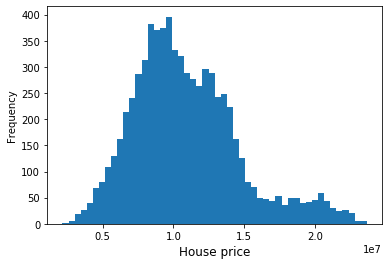

In [412]:
data["SALES_PRICE"].plot.hist(bins=50)
plt.xlabel("House price",fontsize=12)

Very small number of house having high price
Distribution is slightly right skewed

Text(0.5, 0, 'House price')

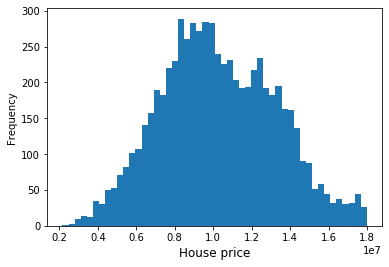

In [413]:
(data["SALES_PRICE"].loc[data["SALES_PRICE"]<18000000]).plot.hist(bins=50)
plt.xlabel("House price",fontsize=12)

Text(0.5, 0, 'Area in square feet')

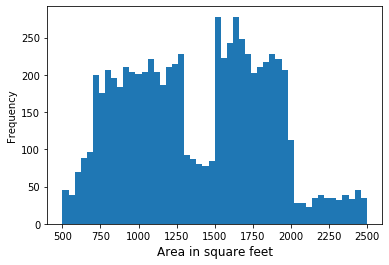

In [414]:
data["INT_SQFT"].plot.hist(bins=50)
plt.xlabel("Area in square feet", fontsize=12)

Most of the price are in between 750 to 1250 and 1500 to 2000 sqft

Text(0.5, 0, 'distance from main road')

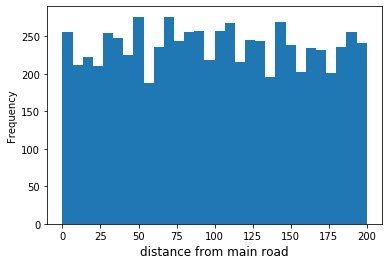

In [415]:
data["DIST_MAINROAD"].plot.hist(bins=30)
plt.xlabel("distance from main road", fontsize=12)

Text(0.5, 0, 'commission')

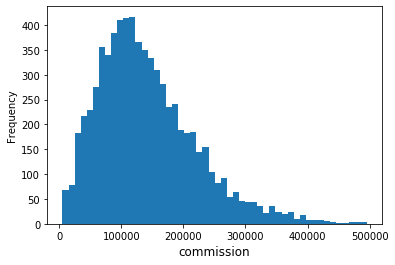

In [416]:
data["COMMIS"].plot.hist(bins=50)
plt.xlabel("commission",fontsize=12)

Distribution is slightly right skewed.
There is very less commision above Rs 270000.

Text(0.5, 0, 'Commision')

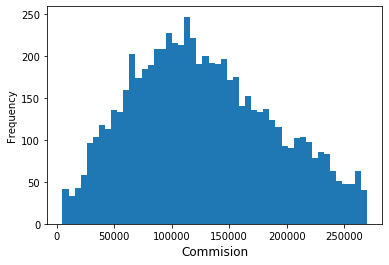

In [417]:
(data["COMMIS"].loc[data["COMMIS"]<270000]).plot.hist(bins=50)
plt.xlabel("Commision",fontsize=12)

# Value counts

In [418]:
data["N_BEDROOM"].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

Four different types of rooms
Variable should be object not integers

In [419]:
data["N_BEDROOM"].value_counts()/len(data)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [420]:
data["N_ROOM"].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

There is no house with one room and very less no. of houses 
has more than six rooms.

In [421]:
data["N_ROOM"].value_counts()/len(data)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

In [422]:
 data["N_BATHROOM"].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

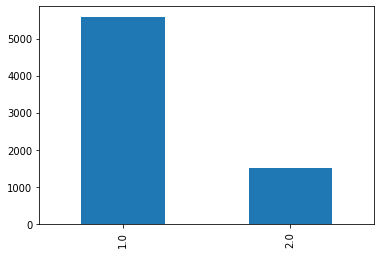

In [423]:
data["N_BATHROOM"].value_counts().plot(kind="bar")

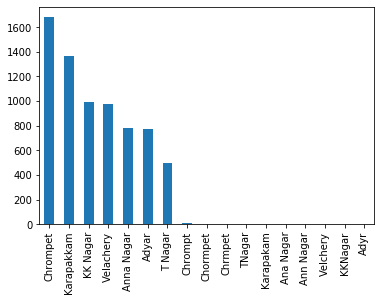

In [424]:
data["AREA"].value_counts().plot(kind="bar")

In [425]:
data["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

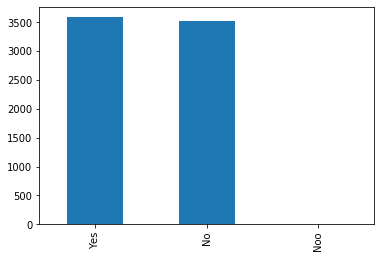

In [426]:
 data["PARK_FACIL"].value_counts().plot.bar()

In [427]:
data["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [428]:
data["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

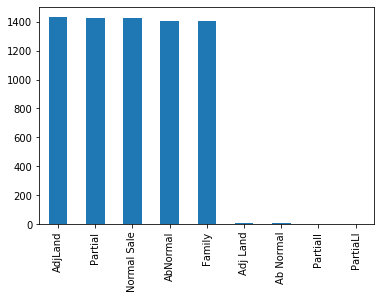

In [429]:
data["SALE_COND"].value_counts().plot(kind="bar")

In [430]:
data["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

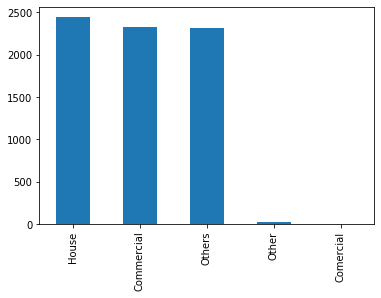

In [431]:
data["BUILDTYPE"].value_counts().plot(kind="bar")

In [432]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

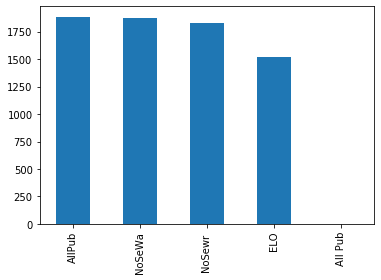

In [433]:
data["UTILITY_AVAIL"].value_counts().plot(kind="bar")

In [434]:
data["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

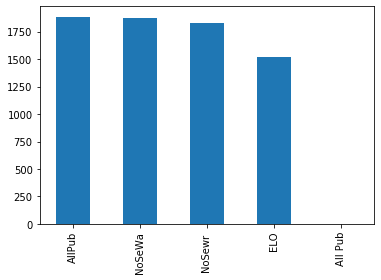

In [435]:
data["UTILITY_AVAIL"].value_counts().plot(kind="bar")

In [436]:
data["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

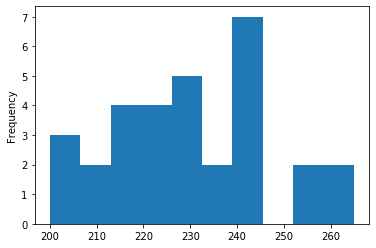

In [437]:
data["QS_ROOMS"].value_counts().plot(kind="hist")

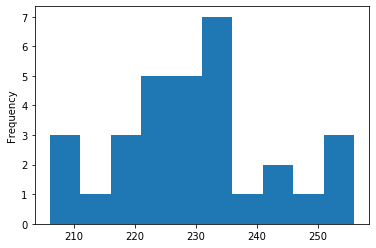

In [438]:
data["QS_BATHROOM"].value_counts().plot.hist()

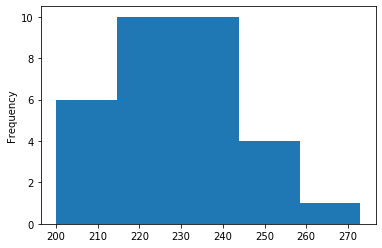

In [439]:
data["QS_BEDROOM"].value_counts().plot.hist(bins=5)

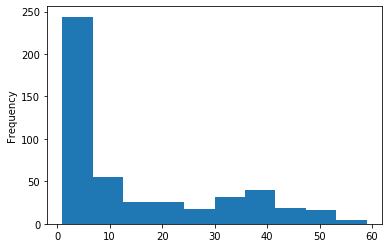

In [440]:
data["QS_OVERALL"].value_counts().plot(kind="hist")

All these QS rating should be categorical in nature

# Data Manipulation

In [441]:
data.shape


(7109, 19)

In [442]:
data.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [443]:
data.drop_duplicates().shape

(7109, 19)

We dont have any duplicates

In [444]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [445]:
data.dropna()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [446]:
 data["N_BEDROOM"].mode()

0    1.0
dtype: float64

In [447]:
 data["N_BEDROOM"].fillna(value=(data["N_BEDROOM"].mode()[0]),inplace=True)

In [448]:
#replacing all the values of bathroom on the basis of 
#no of bed room available
for i in range(len(data)):
    if pd.isnull(data["N_BATHROOM"][i])==True:
        if data["N_BEDROOM"][i]==1.0:
            data["N_BATHROOM"][i]=1.0
        else:
            data["N_BATHROOM"][i]=2.0
        

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [449]:
data[["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"]].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [450]:
temp["OVERALL"]=(data["QS_ROOMS"]+data["QS_BEDROOM"]+data["QS_BATHROOM"])/3
pd.concat([data["QS_ROOMS"],data["QS_BATHROOM"],data["QS_BEDROOM"],temp["OVERALL"]],axis=1).head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,OVERALL
0,4.0,3.9,4.9,NaN
1,4.9,4.2,2.5,NaN
2,4.1,3.8,2.2,NaN
3,4.7,3.9,3.6,NaN
4,3.0,2.5,4.1,NaN


In [451]:
def fill_na(x):
    return (x["QS_ROOMS"]+x["QS_BEDROOM"]+x["QS_BATHROOM"])/3

In [452]:
data["QS_OVERALL"]=data.apply(lambda x:fill_na(x) if pd.isnull(x["QS_OVERALL"]) else x["QS_OVERALL"],axis=1)

In [453]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

# Data types

In [454]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [455]:
#changing datatype of bedroom bathroom and rooms
data=data.astype({"N_BEDROOM":"object","N_ROOM":"object","N_BATHROOM":"object"})

# Repalce Categories

In [456]:
temp=["AREA",'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE']
for i in temp:
    print("Value count in",i)
    print(data[i].value_counts())
    print("")

Value count in AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

Value count in N_BEDROOM
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

Value count in N_BATHROOM
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

Value count in N_ROOM
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

Value count in SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

Value count in PARK_FACIL
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

Value count in 

#Sale condition 
#parking facilities
#building type
#utility available
#street
#area
#all these categories require correctness in the data

In [457]:
data["PARK_FACIL"].replace({"Noo":"No"},inplace=True)
data["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [458]:
data["SALE_COND"].replace({"PartiaLl":"Partial","Partiall":"Partial","Adj Land":"AdjLand","Ab Normal":"AbNormal"},inplace=True)
data["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [459]:
data["BUILDTYPE"].replace({"Other":"Others","Comercial":"Commercial"},inplace=True)
data["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [464]:
data["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSeWa":"NoSewa","NoSewr":"NoSewa"},inplace=True)
data["UTILITY_AVAIL"].value_counts()

AllPub     1887
NoSewa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [465]:
data["STREET"].replace({"Pavd":"Paved","No Access":"NoAccess"},inplace=True)
data["STREET"].value_counts()

Paved       2572
Gravel      2520
NoAccess    2017
Name: STREET, dtype: int64

In [468]:
data["AREA"].replace({"Chrompt":"Chrompet","Chormpet":"Chrompet","Chrmpet":"Chrompet","Karapakam":"Karapakkam",
                     "KK Nagar":"KKNagar","Velchery":"Velachery","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Adyr":"Adyar",
                     "TNagar":"T Nagar"},inplace=True)
data["AREA"].value_counts()


Chrompet      1702
Karapakkam    1366
KKNagar        997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

# Bivariate analysis

### House related feartures

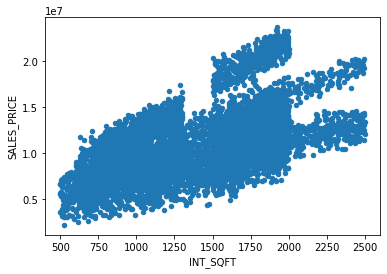

In [469]:
data.plot.scatter("INT_SQFT","SALES_PRICE")

A linear relationship between the sale price and interior area

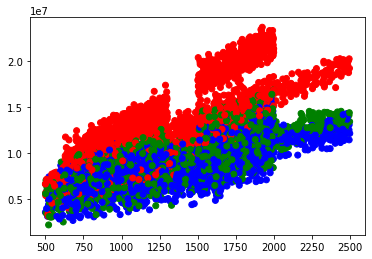

In [472]:
colors={"Commercial":"red","House":"blue","Others":"green"}
fig,ax=plt.subplots()
ax.scatter(data["INT_SQFT"],data["SALES_PRICE"],c=data["BUILDTYPE"].apply(lambda x:colors[x]))

In [475]:
data.pivot_table(values="SALES_PRICE",index="N_BEDROOM",columns="N_BATHROOM",aggfunc="median")

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


Text(0, 0.5, 'Sales Price')

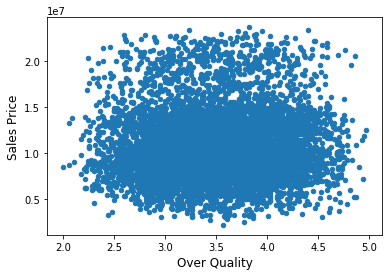

In [477]:
data.plot.scatter("QS_OVERALL","SALES_PRICE")
plt.xlabel("Over Quality",fontsize=12)
plt.ylabel("Sales Price",fontsize=12)

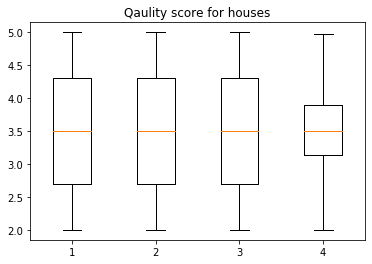

In [485]:
ax=plt.figure().add_subplot(111)
ax.set_title("Qaulity score for houses")
p=ax.boxplot([data["QS_BEDROOM"],data["QS_ROOMS"],data["QS_BATHROOM"],data["QS_OVERALL"]])


50% of overall quality rating lies between 3.2 and 3.7

In [486]:
data.groupby(["BUILDTYPE"]).SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

Commercial houses ha svery high sale price

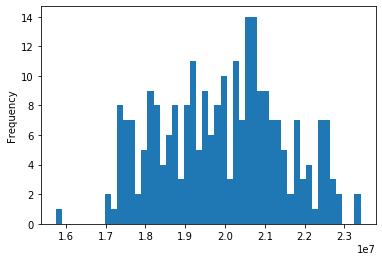

In [487]:
temp_df=data.loc[(data["BUILDTYPE"]=="Commercial")&(data["AREA"]=="Anna Nagar")]
temp_df["SALES_PRICE"].plot.hist(bins=50)

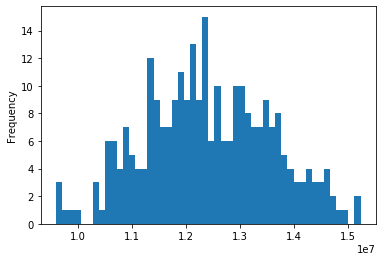

In [488]:
temp_df=data.loc[(data["BUILDTYPE"]=="House")&(data["AREA"]=="Anna Nagar")]
temp_df["SALES_PRICE"].plot.hist(bins=50)

### Sourrounding related features

In [489]:
tem_df=data.groupby(["BUILDTYPE","PARK_FACIL"]).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

House with higher parking facilities has higher price in all categories

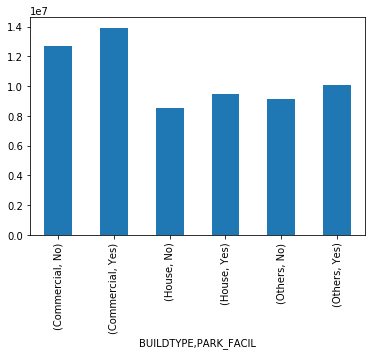

In [491]:
tem_df=data.groupby(["BUILDTYPE","PARK_FACIL"]).SALES_PRICE.median()
tem_df.plot(kind="bar",stacked=True)

In [492]:
data.pivot_table(values="SALES_PRICE",index="AREA",aggfunc="median")

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KKNagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


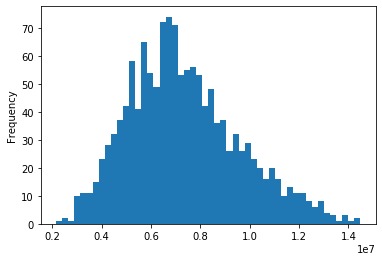

In [493]:
tem_df=data.loc[(data["AREA"]=="Karapakkam")]
tem_df["SALES_PRICE"].plot.hist(bins=50)

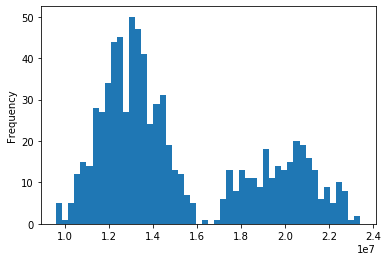

In [494]:
tem_df=data.loc[(data["AREA"]=="Anna Nagar")]
tem_df["SALES_PRICE"].plot.hist(bins=50)

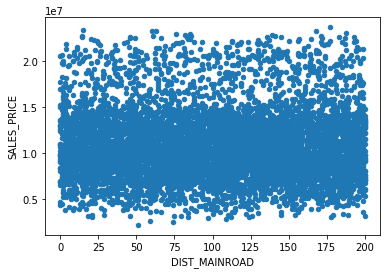

In [498]:
data.plot.scatter("DIST_MAINROAD","SALES_PRICE")

In [500]:
data.groupby(["STREET"]).SALES_PRICE.median()

STREET
Gravel      10847225
NoAccess     9406050
Paved       10470070
Name: SALES_PRICE, dtype: int64

House with no access to road has low sales price

# House sale price

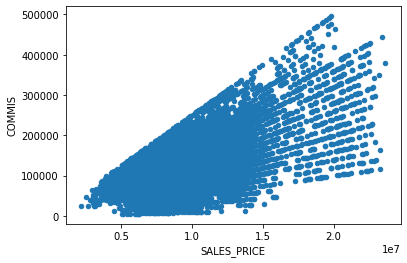

In [503]:
data.plot.scatter("SALES_PRICE","COMMIS")

In [504]:
data["SALES_PRICE"].corr(data["COMMIS"])

0.6262754127126995